# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import json
import requests
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
output_data_file = os.path.join("output_data","cities.csv")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_long = []
cities = []

# Create a set of lat and long combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# set up lists to hold in the dataframe
citylist = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record_count = 0
set_count = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record_count > 49:
            record_count = 1
            set_count += 1
            citylist.append(city)
        else:
            record_count += 1
            citylist.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------")
print("Data Retrieval Complete")      
print("-----------------------")

o-kurilsk
Processing Record 7 of Set 3 | nabire
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 3 | sao filipe
Processing Record 9 of Set 3 | prince rupert
Processing Record 10 of Set 3 | panjab
Processing Record 11 of Set 3 | vila velha
Processing Record 12 of Set 3 | east london
City not found. Skipping...
Processing Record 13 of Set 3 | varhaug
Processing Record 14 of Set 3 | copiapo
Processing Record 15 of Set 3 | qaqortoq
Processing Record 16 of Set 3 | bilsi
Processing Record 17 of Set 3 | usinsk
Processing Record 18 of Set 3 | alekseyevka
Processing Record 19 of Set 3 | aurich
Processing Record 20 of Set 3 | richards bay
Processing Record 21 of Set 3 | olinda
Processing Record 22 of Set 3 | puerto ayora
Processing Record 23 of Set 3 | klaksvik
Processing Record 24 of Set 3 | cabedelo
Processing Record 25 of Set 3 | cherskiy
Processing Record 26 of Set 3 | nelson bay
Processing Record 27 of Set 3 | cape town
Processing Record 28 of Set 3 | khata

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert Raw Data to DataFrame
weather_df = pd.DataFrame({
     'City': citylist,
     'Lat': lat,
     'Lng': lng,
     'Max Temperature': max_temp,
     'Humidity': humidity,
     'Cloudiness': cloudiness,
     'Wind Speed': wind_speed,
     'Country': country,
     'Date': date,
     })
# Export the city data into a .csv.
weather_df.to_csv(output_data_file)
# Display the DataFrame
weather_df

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,26.00,41,0,4.63,ZA,1612278813
1,tungor,53.3808,142.9564,-31.80,84,100,6.87,RU,1612278813
2,bluff,-46.6000,168.3333,14.41,90,56,2.14,NZ,1612278814
3,guanica,17.9716,-66.9080,27.78,63,18,3.13,PR,1612278814
4,hasaki,35.7333,140.8333,4.00,52,20,2.57,JP,1612278814
...,...,...,...,...,...,...,...,...,...
554,cap malheureux,-19.9842,57.6142,27.22,74,1,3.13,MU,1612278888
555,vila nova de milfontes,37.7238,-8.7828,16.67,59,31,2.68,PT,1612278888
556,ambovombe,-25.1667,46.0833,28.16,76,0,6.49,MG,1612278888
557,san quintin,30.4833,-115.9500,16.35,68,100,3.42,MX,1612278889


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.describe()

,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.368050,16.873550,10.754669,70.940966,50.799642,3.927120,1.612279e+09
std,33.358446,90.141319,18.632252,20.652660,39.543306,2.750918,5.359546e+01
min,-54.800000,-175.200000,-42.360000,1.000000,0.000000,0.110000,1.612278e+09
25%,-6.860550,-65.203700,-2.000000,60.000000,1.500000,1.970000,1.612279e+09
50%,23.916700,19.776000,16.000000,76.000000,50.000000,3.130000,1.612279e+09
75%,49.191700,94.391650,26.610000,86.000000,90.000000,5.575000,1.612279e+09
max,78.218600,179.316700,38.790000,100.000000,100.000000,16.460000,1.612279e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

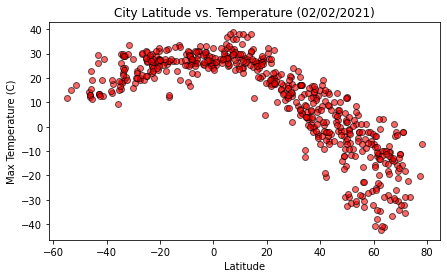

In [9]:
# Latitude vs. Temperature Plot

cities_lat = weather_df["Lat"]
cities_temp = weather_df["Max Temperature"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.6)

plt.title('City Latitude vs. Temperature (02/02/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig("output_data/Lat vs. Temp.png")

## Latitude vs. Humidity Plot

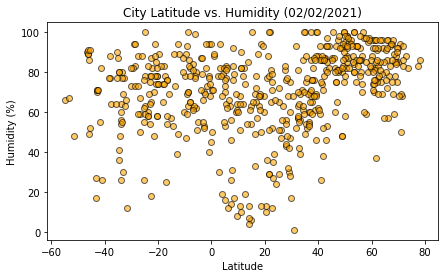

In [10]:
# Latitude vs. Humidity Plot

cities_hum = weather_df["Humidity"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_hum, marker="o", facecolors="orange", edgecolors="black", alpha=0.6)

plt.title('City Latitude vs. Humidity (02/02/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Lat vs. Humidity.png")

## Latitude vs. Cloudiness Plot

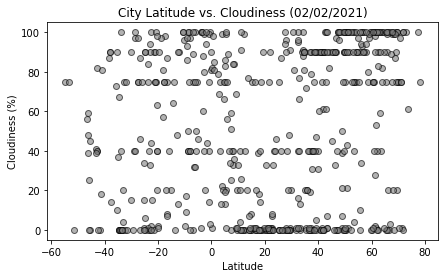

In [11]:
# Latitude vs. Cloudiness Plot

cities_cloud = weather_df["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_cloud, marker="o", facecolors="grey", edgecolors="black", alpha=0.6)

plt.title('City Latitude vs. Cloudiness (02/02/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Lat vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

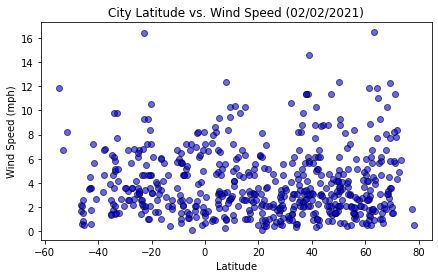

In [12]:
# Latitude vs. Wind Speed Plot

cities_wind = weather_df["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.6)

plt.title('City Latitude vs. Wind Speed (02/02/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Lat vs. Wind Speed.png")

## Linear Regression

In [13]:
north_hemp = weather_df[weather_df["Lat"] >= 0]
south_hemp = weather_df[weather_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7697754246286477


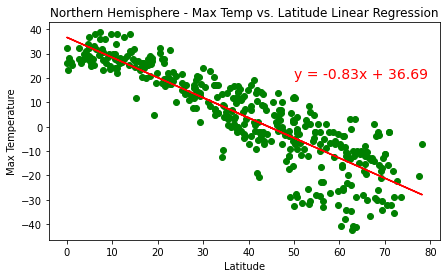

In [14]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_temp = north_hemp["Max Temperature"]

corr = round(st.pearsonr(north_cities_lat, north_cities_temp,)[0],2)
x_values = north_cities_lat
y_values = north_cities_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_temp, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
ax1.annotate(line_eq, (50, 20), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/NH - Max Temp vs. Lat LinRegress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.34867603170272976


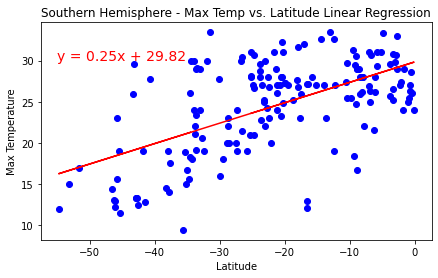

In [15]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_temp = south_hemp["Max Temperature"]

corr = round(st.pearsonr(south_cities_lat, south_cities_temp,)[0],2)
x_values = south_cities_lat
y_values = south_cities_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_temp, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
ax1.annotate(line_eq, (-55, 30), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/SH - Max Temp vs. Lat LinRegress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2227048604496705


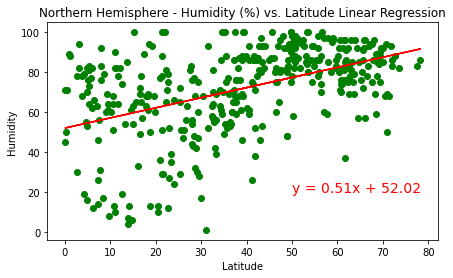

In [16]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_hum = north_hemp["Humidity"]

corr = round(st.pearsonr(north_cities_lat, north_cities_hum,)[0],2)
x_values = north_cities_lat
y_values = north_cities_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_hum, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
ax1.annotate(line_eq, (50, 20), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/NH - Humidity vs. Lat LinRegress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.022159289578263196


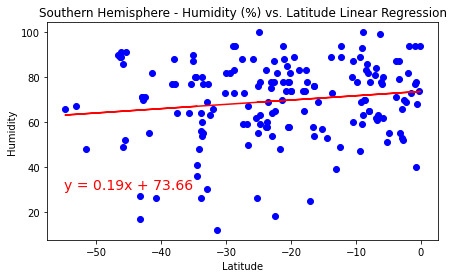

In [17]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_hum = south_hemp["Humidity"]

corr = round(st.pearsonr(south_cities_lat, south_cities_hum,)[0],2)
x_values = south_cities_lat
y_values = south_cities_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_hum, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
ax1.annotate(line_eq, (-55, 30), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/SH - Humidity vs. Lat LinRegress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.10371056311940643


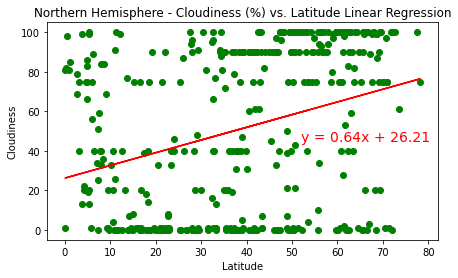

In [18]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_cloud = north_hemp["Cloudiness"]

corr = round(st.pearsonr(north_cities_lat, north_cities_cloud,)[0],2)
x_values = north_cities_lat
y_values = north_cities_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_cloud, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
ax1.annotate(line_eq, (52, 45), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/NH - Cloudiness vs. Lat LinRegress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.06779999488889601


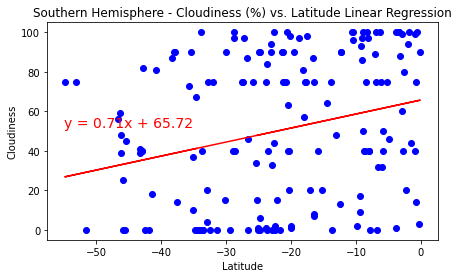

In [19]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_cloud = south_hemp["Cloudiness"]

corr = round(st.pearsonr(south_cities_lat, south_cities_cloud,)[0],2)
x_values = south_cities_lat
y_values = south_cities_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_cloud, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
ax1.annotate(line_eq, (-55, 52), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/SH - Cloudiness vs. Lat LinRegress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0016557294496896957


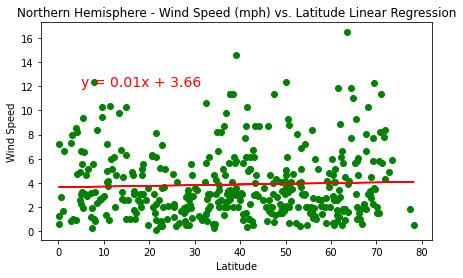

In [20]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_wind = north_hemp["Wind Speed"]

corr = round(st.pearsonr(north_cities_lat, north_cities_wind,)[0],2)
x_values = north_cities_lat
y_values = north_cities_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_wind, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
ax1.annotate(line_eq, (5, 12), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/NH - Wind Speed vs. Lat LinRegress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0009189239488990068


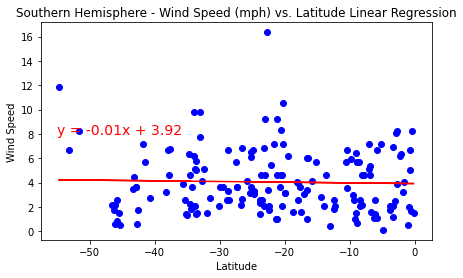

In [21]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_wind = south_hemp["Wind Speed"]

corr = round(st.pearsonr(south_cities_lat, south_cities_wind,)[0],2)
x_values = south_cities_lat
y_values = south_cities_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_wind, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
ax1.annotate(line_eq, (-55, 8), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")
plt.savefig("output_data/SH - Wind Speed vs. Lat LinRegress.png")

In [22]:
#### For Part I, you must include a written description of three observable trends based on the data.

In [ ]:
# 1. The Lat vs. Max Temp Plot shows an increase of temperature the closer cities are to the equator. It is interesting to find that the higher up from the equator, the colder it gets which is confirmed in the Northern Hemisphere Latitude vs. Max Temperature Linear regression plot. 

# 2. Although there are small patterns to the humidity and cloudiness of the cities from their distance to the equator, the the low r-values in each of their Linear Regression plots both from Northern and Southern Hemispheres each confirm that these patterns are not of great significance.

# 3. There is no correlation between the proximity of cities from the equator and their Wind Speed as is easily noticable in the plot and verified even further by the r-values in the Linear regression on both groups from Northern and Southern Hemispheres. 